## Bibliotecas

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import matplotlib.ticker as ticker

## Caso 1

Abra o arquivo TFP.csv anexado.

A série é composta por TFP (variável rtfpna) a preços nacionais constantes (2005 = 1) para três países: Estados Unidos (EUA), Canadá (CAN) e México (MEX).

Faça uma análise exploratória dos dados;

Prever 10 anos da série (se você está realizando o exercício em R, use o pacote “previsão”);

Verifique nas páginas 2 e 3 do link a seguir: https://cran.r-project.org/web/packages/pwt8/pwt8.pdf para ver uma lista de todas as variáveis ​​no conjunto de dados original. Você pode pensar em outro recurso que poderia ser útil para explicar a série TFP? Explicar.

## Leitura do arquivo TPF.csv

In [324]:
tpf = pd.read_csv('/content/TFP.csv')
tpf.head()

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


In [325]:
#Tamanho do arquivo
tpf.shape
print(f'O arquivo tem um total de {tpf.shape[0]} linhas, e {tpf.shape[1]} colunas')

O arquivo tem um total de 186 linhas, e 3 colunas


In [326]:
#informações das variáveis
tpf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   isocode  186 non-null    object 
 1   year     186 non-null    int64  
 2   rtfpna   186 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


In [327]:
#Colocando os anos(year) como indice
tpf = tpf.set_index('year')
tpf.head()

,isocode,rtfpna
year,,
1950,USA,0.617148
1951,USA,0.629588
1952,USA,0.638451
1953,USA,0.651858
1954,USA,0.646179


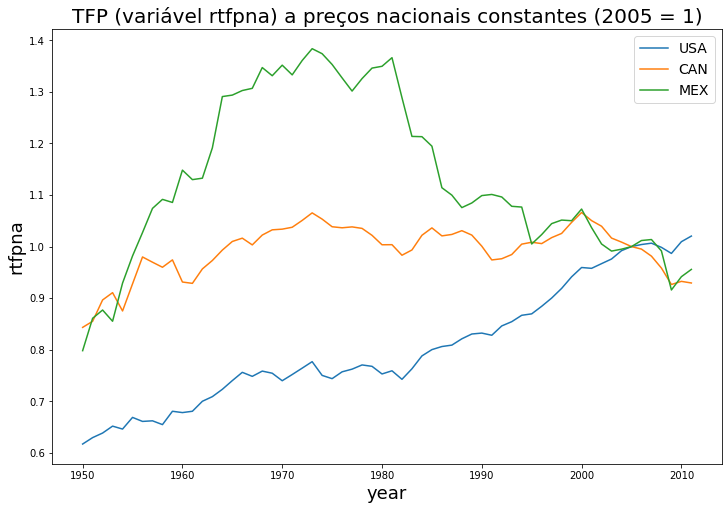

In [328]:
#Gráfico para análise geral dos dados, o comportamento do tpf durante os anos
ax = sns.lineplot(data=tpf, x='year', y='rtfpna', hue='isocode')

#configuração do gráfico
#Título
plt.title('TFP (variável rtfpna) a preços nacionais constantes (2005 = 1)', fontsize=20)

#Título eixo x
plt.xlabel('year', fontsize=18)

#Título eixo y
plt.ylabel('rtfpna', fontsize=18)

#tamanho da imagem
ax.figure.set_size_inches(12,8)

#legenda
plt.legend(loc='best',fontsize=14 )

ax;

### Analisando os níveis relativos de renda, produção, insumos e produtividade entre os anos de 1950 a 2011, verificamos que o México teve um alto crescimento de 1950 a 1970 e a partir de 1980 teve uma queda considerável até 1990 e desde então vem em queda gradativa.

### O Canadá durante o periodo analisado (1950 a 2011), mantem estável em relação aos outros paises em comparação. Manteve um ritmo de crescimento e queda variando em 0.8 a 1.1 rtfpna.

### Os Estados Unidos desde os anos de 1950 mantem um crescimento gradativo até 2011, com um comportamento positivo ano após ano. 


## Caso 2

Anexado a este teste está um arquivo .csv que contém os dados do Comexstat , que é basicamente a fonte oficial de dados das exportações e importações brasileiras, mantida pelo governo;
O conjunto de dados contém todos os rastreamentos de importações e exportações mensais de uma gama de produtos (soja, farelo de soja, óleo de soja, milho, trigo e açúcar), por estados brasileiros, por rotas (aérea, marítima, terrestre, etc) e de / para qual país;
Pedimos que você responda a algumas perguntas abaixo. Lembre-se de que a visualização de dados é uma habilidade importante a ser mostrada, além de qualquer habilidade analítica. Então, nós o encorajamos a usar e explorar uma série de gráficos e tabelas para mostrar seu ponto de vista.
Mostrar a evolução das exportações totais mensais e anuais do Brasil (todos os estados e para todos os lugares) de 'soja', 'óleo de soja' e 'farelo de soja';

Quais os 3 produtos mais importantes exportados pelo Brasil nos últimos 5 anos?

Quais são as principais rotas pelas quais o Brasil tem exportado 'milho' nos últimos anos? Existem diferenças na importância relativa das rotas dependendo do produto?

Quais os países que têm sido os parceiros comerciais mais importantes do Brasil em termos de 'milho' e 'açúcar' nos últimos 3 anos?

Para cada um dos produtos no conjunto de dados, mostra os 5 estados mais importantes em termos de exportações?

Agora, pedimos que você mostre suas habilidades de modelagem. Sinta-se à vontade para usar qualquer tipo de abordagem de modelagem, mas tenha em mente que a abordagem de modelagem depende da natureza de seus dados e, portanto, modelos diferentes geram estimativas e previsões diferentes. Para ajudá-lo nesta tarefa, também fornecemos um conjunto de dados de possíveis covariáveis ​​(.xlsx). Todos eles vêm de fontes públicas (FMI, Banco Mundial) e são apresentados em formato de número de índice. Pergunta: Qual deve ser o total brasileiro de soja, farelo de soja e projeções de exportação de milho, em toneladas, para os próximos 11 anos (2020-2030)? Estamos mais interessados ​​na previsão anual.

## Leitura do arquivo data_comexstat

In [329]:
comexstat = pd.read_csv('/content/data_comexstat.csv', encoding= 'iso8859-1')
comexstat.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [330]:
print(f'Quantidade de linhas: {comexstat.shape[0]}\nQuantidade de colunas: {comexstat.shape[1]}')

Quantidade de linhas: 117965
Quantidade de colunas: 8


In [331]:
#Informações das variáveis
comexstat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     117965 non-null  object 
 1   product  117965 non-null  object 
 2   state    117965 non-null  object 
 3   country  117965 non-null  object 
 4   type     117965 non-null  object 
 5   route    117965 non-null  object 
 6   tons     117965 non-null  float64
 7   usd      117965 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


In [332]:
#Transformando a coluna date no formato datetime
comexstat['date'] = pd.to_datetime(comexstat['date'])
comexstat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     117965 non-null  datetime64[ns]
 1   product  117965 non-null  object        
 2   state    117965 non-null  object        
 3   country  117965 non-null  object        
 4   type     117965 non-null  object        
 5   route    117965 non-null  object        
 6   tons     117965 non-null  float64       
 7   usd      117965 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 7.2+ MB


### Quais os 3 produtos mais importantes exportados pelo Brasil nos últimos 5 anos?

In [333]:
#verificando ultima data do DataFrame
ultimo_ano = comexstat['date'].iloc[-1:]
ultimo_ano

117964   2019-12-01
Name: date, dtype: datetime64[ns]

In [334]:
#Filtrando os ultimos 5 anos
ultimos_5_anos = comexstat[comexstat['date'] >= '2015-01-01']
ultimos_5_anos.head()

,date,product,state,country,type,route,tons,usd
75505,2015-01-01,corn,BA,Morocco,Export,Sea,7486.339,1370000.0
75506,2015-01-01,corn,DF,Taiwan,Export,Sea,6.085,1168.0
75507,2015-01-01,corn,ES,South Korea,Export,Sea,50.000,8135.0
75508,2015-01-01,corn,GO,China,Export,Sea,41331.166,8143579.0
75509,2015-01-01,corn,GO,Costa Rica,Export,Sea,40.000,13140.0


In [335]:
#Ordenado por produtos
tres_principais_produtos = ultimos_5_anos.pivot_table(ultimos_5_anos, index='product',
                                            aggfunc = np.sum)
tres_principais_produtos

,tons,usd
product,,
corn,1.514176e+08,2.552031e+10
soybean_meal,7.665449e+07,2.841361e+10
soybean_oil,6.944066e+06,4.955738e+09
soybeans,3.276226e+08,1.237467e+11
sugar,1.200425e+08,4.094732e+10
wheat,3.533857e+07,7.421845e+09


In [336]:
#Ordenando por valores (usd) totais de exportação
tres_principais_produtos = tres_principais_produtos.reset_index()
tres_principais_produtos = tres_principais_produtos.sort_values(by=['usd'], ascending=False)
tres_principais_produtos

,product,tons,usd
3,soybeans,3.276226e+08,1.237467e+11
4,sugar,1.200425e+08,4.094732e+10
1,soybean_meal,7.665449e+07,2.841361e+10
0,corn,1.514176e+08,2.552031e+10
5,wheat,3.533857e+07,7.421845e+09
2,soybean_oil,6.944066e+06,4.955738e+09


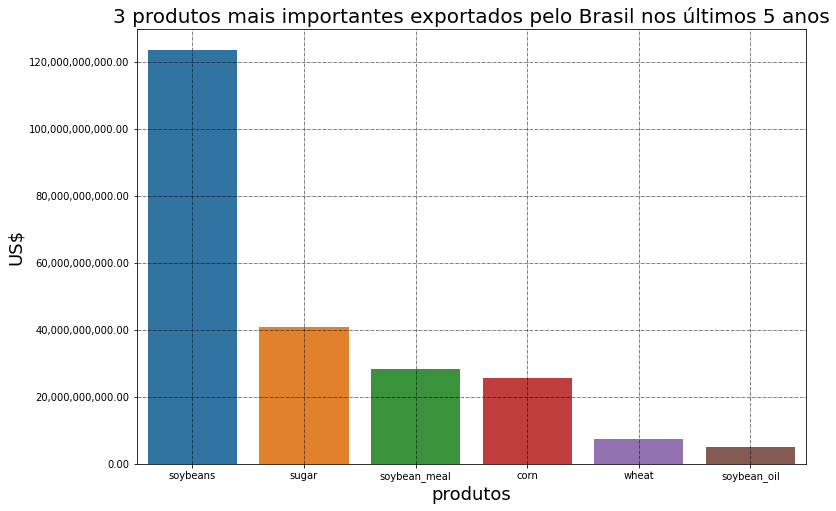

In [337]:
#Gráfico ordenado por produto mais importante exportado pelo Brasil em bilhões de dolares
ax = sns.barplot(data= tres_principais_produtos, x='product', y='usd')

#configuração do gráfico
#Título
plt.title('3 produtos mais importantes exportados pelo Brasil nos últimos 5 anos', fontsize=20)

#Título eixo x
plt.xlabel('produtos', fontsize=18)

#Título eixo y e formatação de valores
plt.ylabel('US$', fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#tamanho da imagem
ax.figure.set_size_inches(12,8)

#configurar grid
ax.grid(color='black', linestyle='-.', linewidth=0.5)
ax;

## Os 3 produtos mais importantes exportados pelo o Brasil são:
1. Soja
2. Açúcar
3. Farinha de Soja



## Quais são as principais rotas pelas quais o Brasil tem exportado 'milho' nos últimos anos? Existem diferenças na importância relativa das rotas dependendo do produto?

In [338]:
#Selecionando exportações de milho
milho = ultimos_5_anos[(ultimos_5_anos['product'] == 'corn') & (ultimos_5_anos['type'] == 'Export')]
milho.head()

,date,product,state,country,type,route,tons,usd
75505,2015-01-01,corn,BA,Morocco,Export,Sea,7486.339,1370000.0
75506,2015-01-01,corn,DF,Taiwan,Export,Sea,6.085,1168.0
75507,2015-01-01,corn,ES,South Korea,Export,Sea,50.000,8135.0
75508,2015-01-01,corn,GO,China,Export,Sea,41331.166,8143579.0
75509,2015-01-01,corn,GO,Costa Rica,Export,Sea,40.000,13140.0


In [339]:
#Agrupando por tipo de rota e quantidade exportada em toneladas
principais_rotas_tons = milho.groupby("route")["tons"].sum()
principais_rotas_tons = principais_rotas_tons.to_frame()
principais_rotas_tons = principais_rotas_tons.sort_values(by=['tons'], ascending=False)
principais_rotas_tons = principais_rotas_tons.reset_index()
principais_rotas_tons

,route,tons
0,Sea,1.383810e+08
1,River,5.869627e+06
2,Other,2.660552e+05
3,Ground,7.250953e+04
4,Air,1.015261e+04


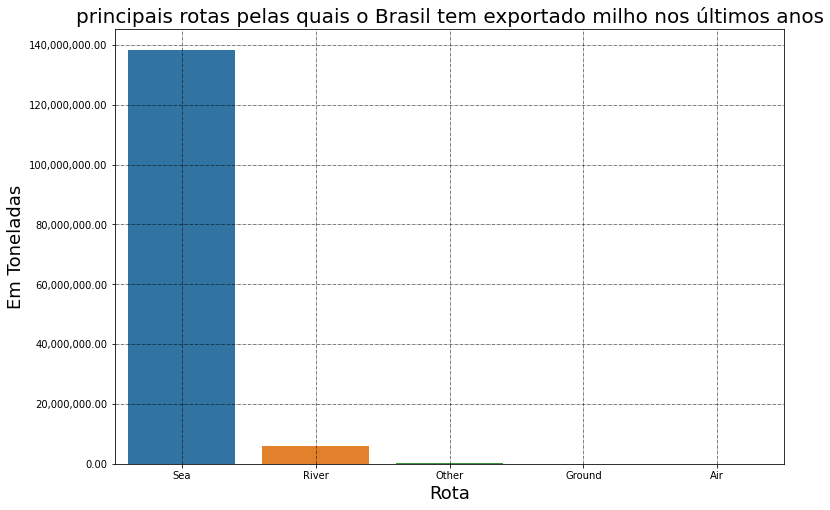

In [340]:
#Gráfico de exportações de milho em toneladas
ax = sns.barplot(data= principais_rotas_tons, x='route', y='tons')

#configuração do gráfico
#Título
plt.title('principais rotas pelas quais o Brasil tem exportado milho nos últimos anos', fontsize=20)

#Título eixo x
plt.xlabel('Rota', fontsize=18)

#Título eixo y e formatação de valores
plt.ylabel('Em Toneladas', fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#tamanho da imagem
ax.figure.set_size_inches(12,8)

#configurar grid
ax.grid(color='black', linestyle='-.', linewidth=0.5)
ax;

In [341]:
#Agrupando por tipo de rota e quantidade exportada em US$
principais_rotas_usd = milho.groupby("route")["usd"].sum()
principais_rotas_usd = principais_rotas_usd.to_frame()
principais_rotas_usd = principais_rotas_usd.sort_values(by=['usd'],ascending=False)
principais_rotas_usd = principais_rotas_usd.reset_index()
principais_rotas_usd

,route,usd
0,Sea,2.326112e+10
1,River,9.663762e+08
2,Ground,1.717586e+08
3,Other,4.413550e+07
4,Air,4.334926e+06


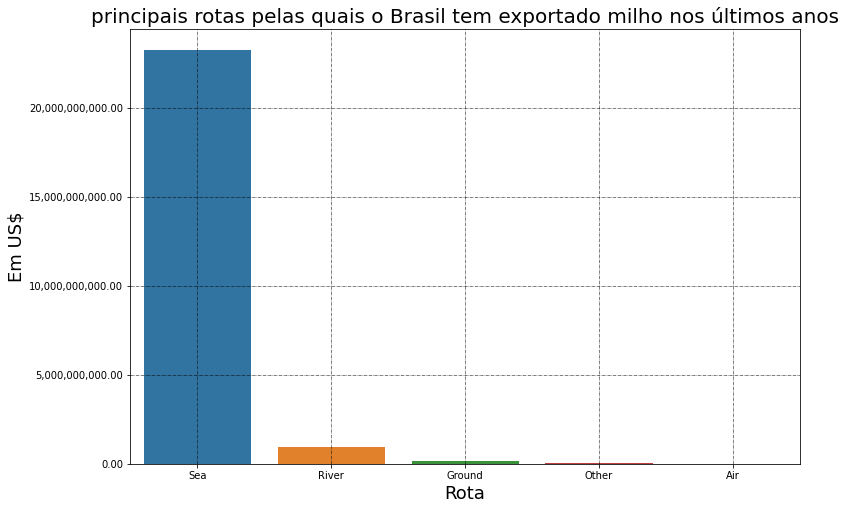

In [342]:
#Gráfico de exportações de milho em US$
ax = sns.barplot(data= principais_rotas_usd, x='route', y='usd')

#configuração do gráfico
#Título
plt.title('principais rotas pelas quais o Brasil tem exportado milho nos últimos anos', fontsize=20)

#Título eixo x
plt.xlabel('Rota', fontsize=18)

#Título eixo y e formatação de valores
plt.ylabel('Em US$', fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#tamanho da imagem
ax.figure.set_size_inches(12,8)

#configurar grid
ax.grid(color='black', linestyle='-.', linewidth=0.5)
ax;

O Brasil utiliza o mar e o rio como suas principais rotas de exportação de milho tanto em quantidades(toneladas), quanto em valores(US$).

In [343]:
#Existem diferenças na importância relativa das rotas dependendo do produto?
#Selecionando somente as exportações
exportacoes = ultimos_5_anos[ultimos_5_anos['type'] == 'Export']
exportacoes.head()

,date,product,state,country,type,route,tons,usd
75505,2015-01-01,corn,BA,Morocco,Export,Sea,7486.339,1370000.0
75506,2015-01-01,corn,DF,Taiwan,Export,Sea,6.085,1168.0
75507,2015-01-01,corn,ES,South Korea,Export,Sea,50.000,8135.0
75508,2015-01-01,corn,GO,China,Export,Sea,41331.166,8143579.0
75509,2015-01-01,corn,GO,Costa Rica,Export,Sea,40.000,13140.0


In [344]:
exportacoes = pd.pivot_table(ultimos_5_anos, index=['product', 'route'],
                             values=['tons'],aggfunc = np.sum)
exportacoes = exportacoes.sort_values(by=['route','tons'])
exportacoes

tons
product      route               
wheat        Air     5.533000e+00
soybean_oil  Air     3.249300e+01
soybeans     Air     7.558000e+01
sugar        Air     1.729690e+02
corn         Air     1.025235e+04
soybean_meal Air     2.205445e+04
             Ground  1.259529e+04
soybean_oil  Ground  1.840786e+05
sugar        Ground  6.297943e+05
soybeans     Ground  1.389425e+06
wheat        Ground  2.514602e+06
corn         Ground  4.734133e+06
wheat        Other   1.148200e+01
soybean_oil  Other   2.413748e+04
sugar        Other   4.784887e+04
soybean_meal Other   9.149716e+04
corn         Other   2.660552e+05
soybeans     Other   1.519021e+06
soybean_meal River   1.974000e+02
soybean_oil  River   3.409907e+03
wheat        River   2.748420e+04
sugar        River   4.678631e+04
corn         River   5.869627e+06
soybeans     River   8.566090e+06
soybean_oil  Sea     6.732408e+06
wheat        Sea     3.279647e+07
soybean_meal Sea     7.652815e+07
sugar        Sea     1.193179e+08
corn         Sea     1.405375e+08
soybeans     Sea     3.161480e+08

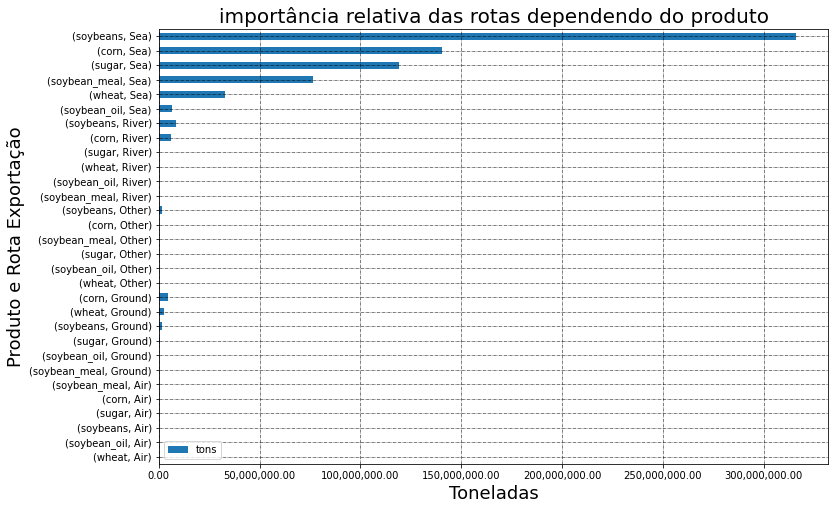

In [345]:
#configuração do gráfico
ax = exportacoes.plot(kind='barh')

#Título
plt.title('importância relativa das rotas dependendo do produto', fontsize=20)

#Título eixo x
plt.xlabel('Toneladas', fontsize=18)

#Título eixo y e formatação de valores
plt.ylabel('Produto e Rota Exportação', fontsize=18)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#tamanho da imagem
ax.figure.set_size_inches(12,8)

#configurar grid
ax.grid(color='black', linestyle='-.', linewidth=0.5)
ax;

Há evidencias que a principal rota de exportações dos produtos brasileiros são realizados via mar. 

## Quais os países que têm sido os parceiros comerciais mais importantes do Brasil em termos de 'milho' e 'açúcar' nos últimos 3 anos?

In [346]:
#Selecionando por produtos (milho e açúcar) nos ultimos 3 anos
parceiro = comexstat[(comexstat['product'] == 'corn') | (comexstat['product'] == 'sugar')]
parceiro = parceiro[(parceiro['type'] == 'Export')]
parceiro = parceiro[(parceiro['date'] >= '2016-01-01')]
parceiro                    

,date,product,state,country,type,route,tons,usd
83308,2016-01-01,corn,DF,Bangladesh,Export,Sea,1.000,188.0
83309,2016-01-01,corn,DF,Netherlands,Export,Sea,237.169,41362.0
83310,2016-01-01,corn,GO,Algeria,Export,Sea,7000.000,1055670.0
83311,2016-01-01,corn,GO,Argentina,Export,Air,0.809,3230.0
83313,2016-01-01,corn,GO,Bangladesh,Export,Sea,40500.000,6735435.0
...,...,...,...,...,...,...,...,...
117919,2019-12-01,sugar,SP,Uruguay,Export,Ground,1890.000,577618.0
117920,2019-12-01,sugar,SP,Venezuela,Export,Ground,80.000,55491.0
117921,2019-12-01,sugar,SP,Venezuela,Export,Sea,8967.646,3828624.0
117922,2019-12-01,sugar,SP,Yemen,Export,Sea,5805.000,1726058.0


In [347]:
#Identificando os principais parceiros comerciais
principais_parceiro = pd.pivot_table(parceiro, index=['country'], values='usd', aggfunc = np.sum)
principais_parceiro = principais_parceiro.sort_values(by=['usd'], ascending=False)
principais_parceiro

,usd
country,
Iran,4.303677e+09
Bangladesh,3.376205e+09
Algeria,3.234897e+09
Egypt,2.990699e+09
India,2.590057e+09
...,...
Luxembourg,7.800000e+01
Saint Vicent and the Granadines,4.600000e+01
Bosnia and Herzegovina,4.000000e+01


In [348]:
#Selecionando os 10 primeiros países
principais_parceiro_10 = principais_parceiro[:10]
principais_parceiro_10 = principais_parceiro_10.sort_values(by=['usd'], ascending=True)

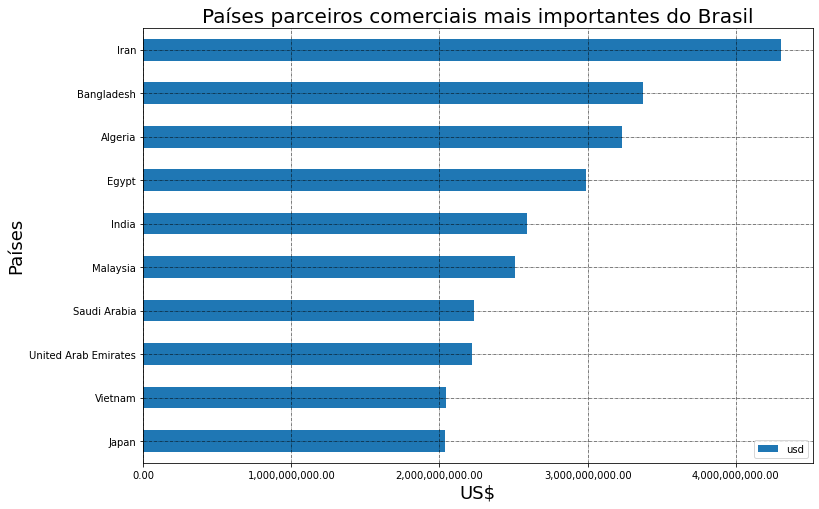

In [349]:
#configuração do gráfico
ax = principais_parceiro_10.plot(kind='barh', )

#Título
plt.title('Países parceiros comerciais mais importantes do Brasil', fontsize=20)

#Título eixo x
plt.xlabel('US$', fontsize=18)

#Título eixo y e formatação de valores
plt.ylabel('Países', fontsize=18)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#tamanho da imagem
ax.figure.set_size_inches(12,8)

#configurar grid
ax.grid(color='black', linestyle='-.', linewidth=0.5)
ax;

Apresentamos os dez primeiros parceiros comerciais de milho e açúcar com o Brasil. Em primeiro lugar está o Iran, onde o Brasil exportou mais de $ 400.000.000.00 com os produtos mencionados.

## Para cada um dos produtos no conjunto de dados, mostra os 5 estados mais importantes em termos de exportações?

In [350]:
#Selecionando as exportações, separando por produtos e estados
cinco_estados = comexstat[comexstat['type'] == 'Export']
cinco_estados = pd.pivot_table(comexstat, index=['product', 'state'], values='usd', aggfunc = np.sum)
cinco_estados = cinco_estados.sort_values(by=['product','usd','state'], ascending=False)
cinco_estados

usd
product state              
wheat   SP     2.559928e+09
        RS     2.426699e+09
        CE     1.744671e+09
        BA     1.289909e+09
        PR     1.266911e+09
...                     ...
corn    AC     1.857114e+06
        RR     5.798980e+05
        AP     2.679660e+05
        SE     1.420310e+05
        AM     6.524200e+04

[152 rows x 1 columns]

## Funções para selecionar 5 estados e plotar o gráfico

In [351]:
#Selecionando os Cinco principais estados 
def seleciona_cinco_estados(product):
  produto = cinco_estados.loc[(cinco_estados.index.get_level_values('product') == product)]
  produto = produto.sort_values(by=['usd'], ascending=False)
  produto = produto[:5]
  return produto

In [352]:
def grafico_do_produto(produto, titulo_nome):
  #configuração do gráfico
  ax = produto.plot(kind='bar')

  #Título
  plt.title(f'5 estados mais importantes em termos de exportações de {titulo_nome}', fontsize=20)

  #Título eixo x
  plt.xlabel('Produto e Estado', fontsize=18)
  plt.xticks(rotation=45, fontsize=12)

  #Título eixo y e formatação de valores
  plt.ylabel('US$', fontsize=18)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

  #tamanho da imagem
  ax.figure.set_size_inches(12,8)

  #configurar grid
  ax.grid(color='black', linestyle='-.', linewidth=0.5)
  return ax;

## Efetuando as pesquisas por produtos

In [353]:
#Verificando produtos existentes no DataFrame
cinco_estados.index.get_level_values('product').unique()

Index(['wheat', 'sugar', 'soybeans', 'soybean_oil', 'soybean_meal', 'corn'], dtype='object', name='product')

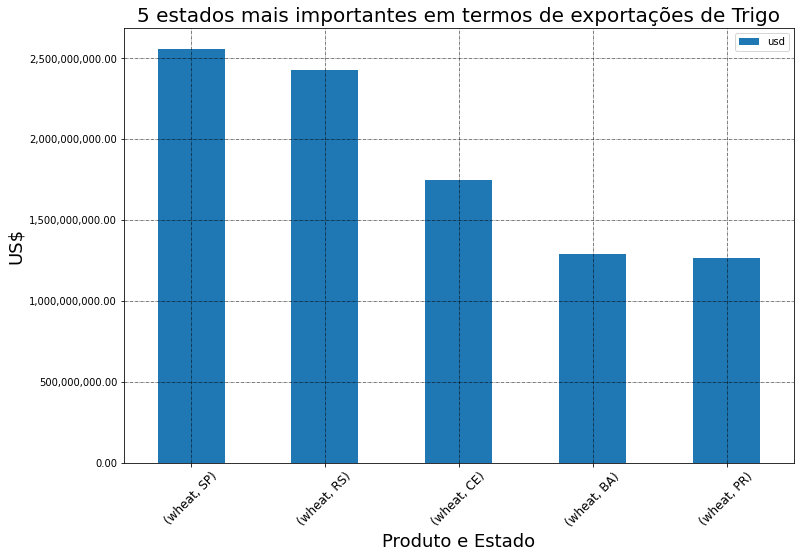

In [354]:
#executando funções
trigo = seleciona_cinco_estados('wheat')
trigo = grafico_do_produto(trigo, 'Trigo')

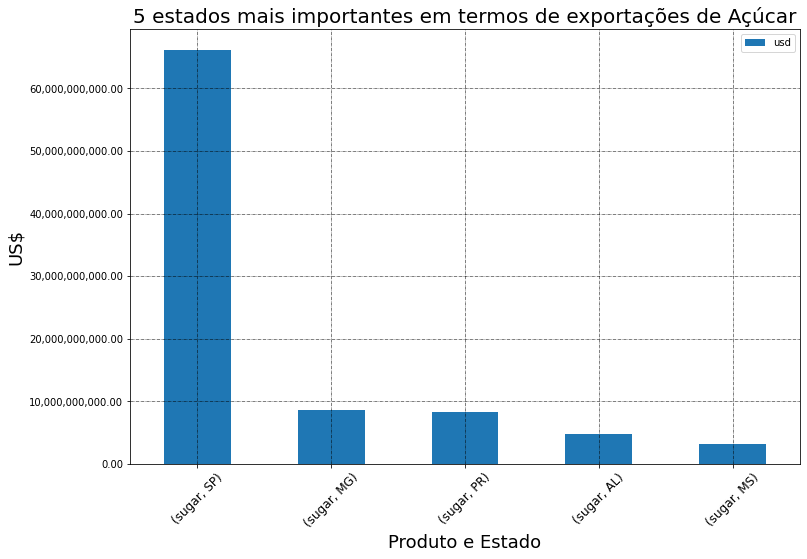

In [355]:
#executando funções
acucar = seleciona_cinco_estados('sugar')
acucar = grafico_do_produto(acucar, 'Açúcar')

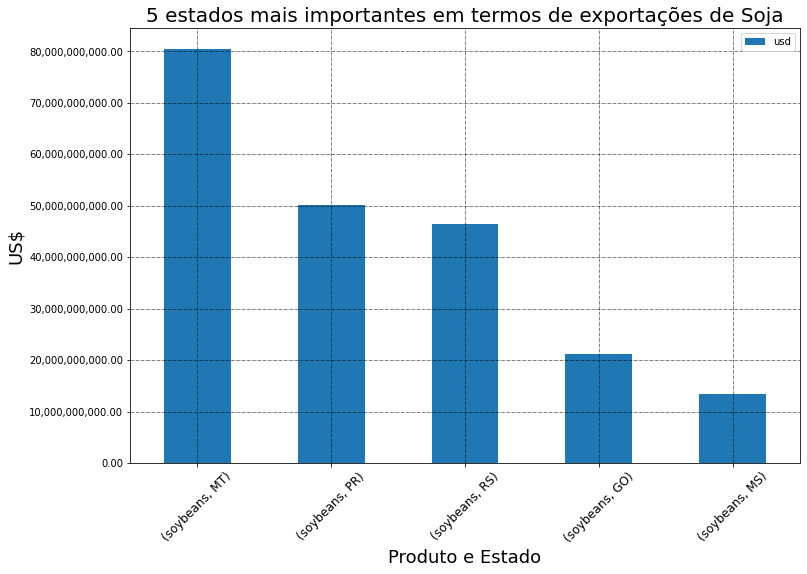

In [356]:
#executando funções
soja = seleciona_cinco_estados('soybeans')
soja = grafico_do_produto(soja, 'Soja')

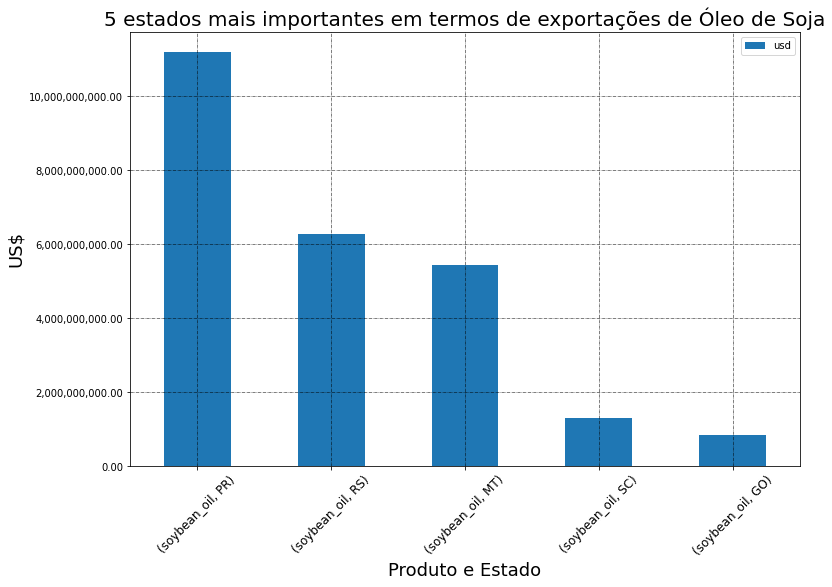

In [357]:
#executando funções
oleo_de_soja = seleciona_cinco_estados('soybean_oil')
oleo_de_soja = grafico_do_produto(oleo_de_soja, 'Óleo de Soja')

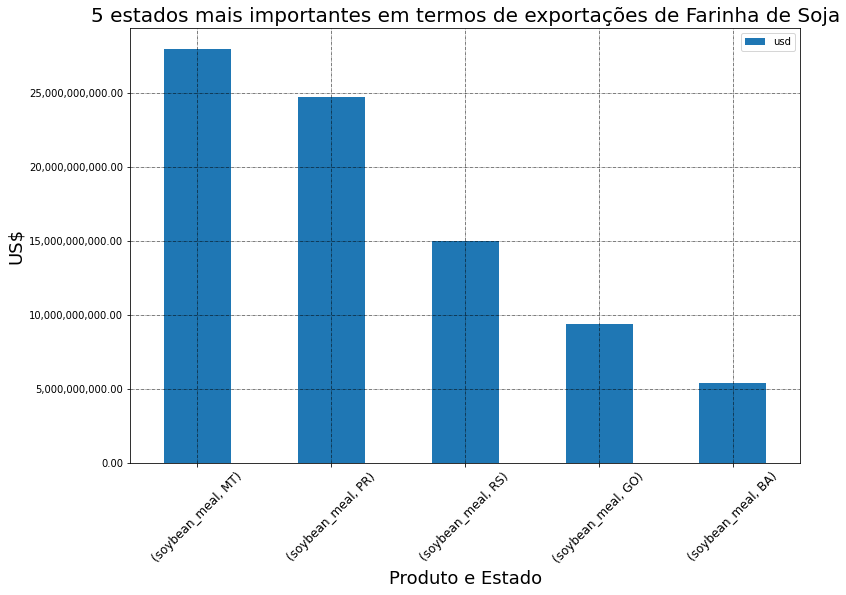

In [358]:
#executando funções
farinha_de_soja = seleciona_cinco_estados('soybean_meal')
farinha_de_soja = grafico_do_produto(farinha_de_soja, 'Farinha de Soja')

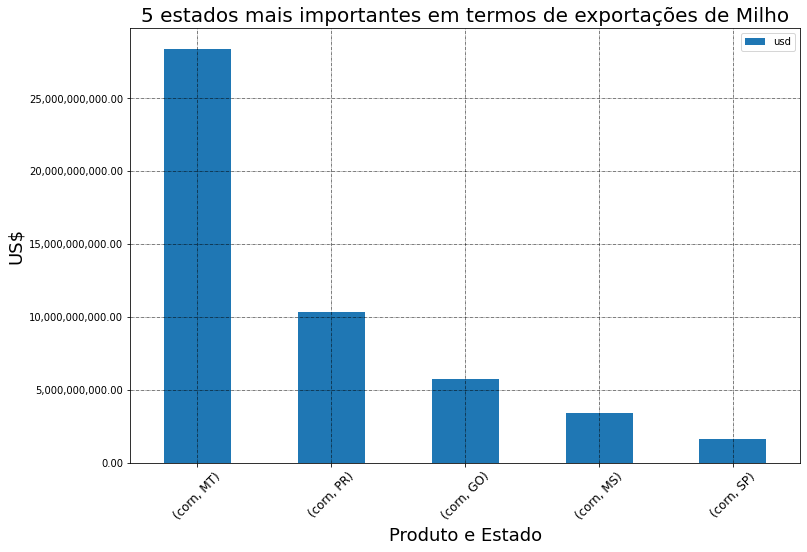

In [359]:
#executando funções
milho = seleciona_cinco_estados('corn')
milho = grafico_do_produto(milho, 'Milho')